In [74]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [75]:
df = pd.read_csv("../data/raw/LPD_2024_public.csv", low_memory=False)

In [76]:
df.head()

,ID,Binomial,Replicate,Included in LPR2024,Citation,Class,Order,Family,Genus,Species,...,2013,2014,2015,2016,2017,2018,2019,2020,Native,Unnamed: 102
0,1,Balearica_regulorum,1,0,"Pomeroy, D. and P. Mwima (2002). The State of ...",Aves,Gruiformes,Gruidae,Balearica,regulorum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,2,Acrocephalus_sechellensis,1,0,"Rands, M. (1989). ""Saving the Seychelles brush...",Aves,Passeriformes,Acrocephalidae,Acrocephalus,sechellensis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2,3,Copsychus_sechellarum,1,0,"Komdeur, J. (1996). ""Breeding of the Seychelle...",Aves,Passeriformes,Muscicapidae,Copsychus,sechellarum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3,4,Copsychus_sechellarum,0,1,"Komdeur, J. (1996). ""Breeding of the Seychelle...",Aves,Passeriformes,Muscicapidae,Copsychus,sechellarum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,5,Falco_punctatus,0,1,"Groombridge, J. J., Bruford, M.W., Jones, C.G,...",Aves,Falconiformes,Falconidae,Falco,punctatus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [77]:
df.shape

(35996, 103)

In [78]:
only_elephants_df = df[df["Common_name"].str.contains("elephant", case=False, na=False)]

In [79]:
only_elephants_df.shape

(149, 103)

In [80]:
only_elephants_df['Country'].value_counts()

Country
South Africa                                    29
Tanzania, United Republic Of                    21
Zambia                                          20
Zimbabwe                                        13
Kenya                                           13
Uganda                                          10
Ghana                                            7
Mozambique                                       5
Botswana                                         4
Namibia                                          4
Cameroon                                         3
Thailand                                         2
India                                            2
Central African Republic                         2
Gabon                                            2
Eswatini                                         2
Côte D'Ivoire                                    2
United States                                    1
Bangladesh                                       1
Congo, The Democratic R

In [81]:
only_elephants_df['Species'].value_counts()

Species
africana          127
cyclotis           11
maximus             6
leonina             4
angustirostris      1
Name: count, dtype: int64

In [82]:
only_african_elephants_df = only_elephants_df[only_elephants_df['Species'].str.contains("africana", case=False, na=False)]

In [83]:
only_african_elephants_df.shape

(127, 103)

In [84]:
only_african_elephants_df['Country'].value_counts()

Country
South Africa                             28
Tanzania, United Republic Of             21
Zambia                                   20
Zimbabwe                                 13
Kenya                                    13
Uganda                                   10
Mozambique                                5
Namibia                                   4
Botswana                                  4
Cameroon                                  2
Eswatini                                  2
Gabon                                     2
Congo, The Democratic Republic Of The     1
Guinea Bissau                             1
Central African Republic                  1
Name: count, dtype: int64

In [85]:
countries = [
    "South Africa",
    "Tanzania, United Republic Of",
    "Zambia",
    "Zimbabwe",
    "Kenya",
    "Uganda"
]

only_african_elephants_df_filtered = only_african_elephants_df[
    only_african_elephants_df["Country"].isin(countries)
]


In [86]:
year_columns = [col for col in only_african_elephants_df_filtered.columns if col.isdigit()]
year_columns

['1950',
 '1951',
 '1952',
 '1953',
 '1954',
 '1955',
 '1956',
 '1957',
 '1958',
 '1959',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020']

In [87]:
elephant_df = only_african_elephants_df_filtered.melt(
    id_vars=[
        'ID', 'Common_name', 'Binomial', 'Country', 'Region',
        'Genus', 'Species'
    ],
    value_vars=year_columns,
    var_name='Year',
    value_name='Population'
)


In [88]:
elephant_df.dropna(subset=["Population"], inplace=True)

elephant_df["Year"] = elephant_df["Year"].astype(int)

elephant_df = elephant_df.sort_values(["ID", "Year"]).reset_index(drop=True)

elephant_df.head(10)

,ID,Common_name,Binomial,Country,Region,Genus,Species,Year,Population
0,111,African elephant,Loxodonta_africana,South Africa,Africa,Loxodonta,africana,1967,6000.0
1,111,African elephant,Loxodonta_africana,South Africa,Africa,Loxodonta,africana,1968,6400.0
2,111,African elephant,Loxodonta_africana,South Africa,Africa,Loxodonta,africana,1969,7600.0
3,111,African elephant,Loxodonta_africana,South Africa,Africa,Loxodonta,africana,1970,8200.0
4,111,African elephant,Loxodonta_africana,South Africa,Africa,Loxodonta,africana,1971,8700.0
5,111,African elephant,Loxodonta_africana,South Africa,Africa,Loxodonta,africana,1972,7800.0
6,111,African elephant,Loxodonta_africana,South Africa,Africa,Loxodonta,africana,1973,7500.0
7,111,African elephant,Loxodonta_africana,South Africa,Africa,Loxodonta,africana,1974,7800.0
8,111,African elephant,Loxodonta_africana,South Africa,Africa,Loxodonta,africana,1975,7600.0
9,111,African elephant,Loxodonta_africana,South Africa,Africa,Loxodonta,africana,1976,7400.0


In [89]:
elephant_df.shape

(521, 9)

In [90]:
elephant_df.to_csv("../data/processed/elephant_df.csv", index=False)


In [91]:
monthly_all = []

for _id in elephant_df["ID"].unique():
    df_id = elephant_df[elephant_df["ID"] == _id].copy()

    df_id = df_id.drop_duplicates(subset="Year")

    df_id["Date"] = pd.to_datetime(df_id["Year"].astype(str) + "-01")

    ts = df_id.set_index("Date")["Population"].sort_index()

    ts = ts.resample("YS").mean()
    ts = ts.interpolate("linear")

    monthly_ts = ts.resample("MS").interpolate("linear")
    monthly_ts.name = f"ID_{_id}"

    monthly_all.append(monthly_ts)

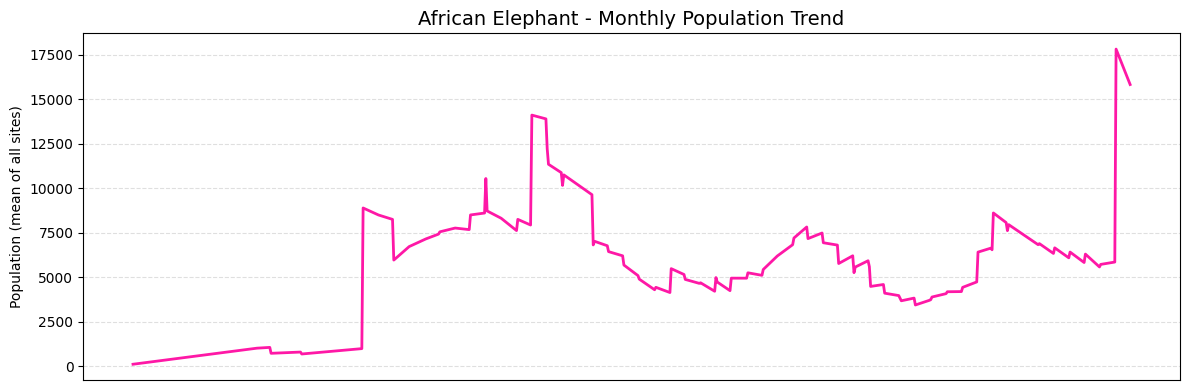

In [92]:
all_monthly_df = pd.concat(monthly_all, axis=1)

elephant_monthly_avg = all_monthly_df.mean(axis=1)


plt.figure(figsize=(12, 4))
plt.plot(elephant_monthly_avg.values, color="#fe18a6", linewidth=2)

plt.title("African Elephant - Monthly Population Trend", fontsize=14)
plt.ylabel("Population (mean of all sites)")
plt.xticks([])
plt.grid(True, which='major', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [93]:
all_monthly_df.describe().T.sort_values("max", ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
ID_14956,457.0,56948.997812,21646.461972,13084.0,42467.333333,56057.433333,67775.000000,109419.0
ID_4737,49.0,68108.500000,1367.844402,65811.0,66959.750000,68108.500000,69257.250000,70406.0
ID_9988,109.0,27784.357798,9165.739900,12262.0,19428.833333,28489.500000,36081.562500,41670.0
ID_18321,301.0,22706.000000,7063.713464,11712.0,16549.666667,21233.777778,29136.583333,35461.0
ID_4740,157.0,26850.238854,5425.939271,15836.0,22904.027778,27400.583333,31404.791667,35409.0
ID_10066,97.0,20729.381443,7511.643299,11000.0,11500.000000,21333.333333,28000.000000,32000.0
ID_115,493.0,8246.638945,8748.896847,1900.0,1971.153846,2393.250000,14055.555556,30000.0
ID_116,85.0,10070.588235,8492.502781,2000.0,3750.000000,5500.000000,16000.000000,30000.0
ID_10072,193.0,16619.170984,5465.975699,9000.0,9000.000000,17513.888889,21250.000000,25000.0
ID_11128,49.0,20490.000000,2461.822243,16355.0,18422.500000,20490.000000,22557.500000,24625.0


In [94]:
filtered_df = all_monthly_df.loc[:, all_monthly_df.max() < 30000]

elephant_monthly_avg = filtered_df.mean(axis=1)

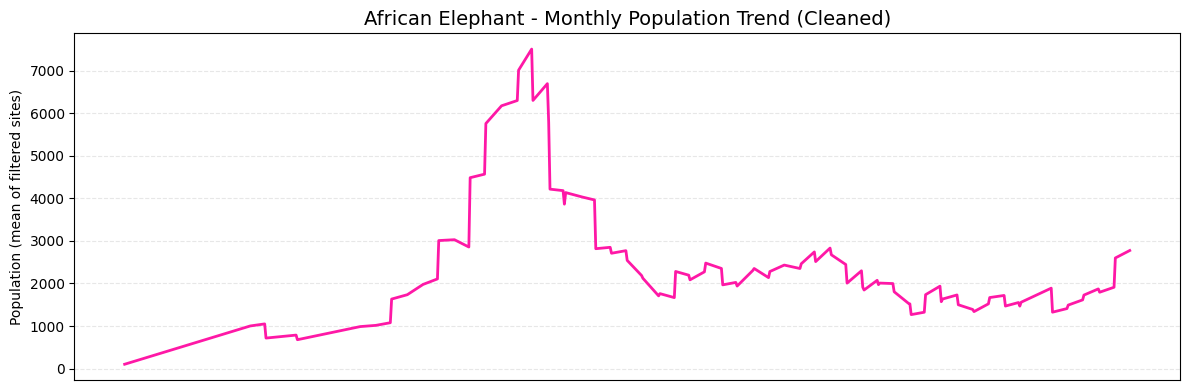

In [95]:
plt.figure(figsize=(12, 4))
plt.plot(elephant_monthly_avg.values, color='#fe18a6', linewidth=2)
plt.title("African Elephant - Monthly Population Trend (Cleaned)", fontsize=14)
plt.ylabel("Population (mean of filtered sites)")
plt.xticks([])
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


In [96]:
elephant_monthly_avg.to_csv("../data/processed/elephant_population_monthly.csv")